### MAPPER - can mapper uncover genre structure?

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import IPython.display as ipd

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import kmapper as km

import utils

In [2]:
(features, tracks) = utils.load_features()
genres = utils.load_genres()

In [3]:

small = tracks[('set', 'subset')] == 'small'
X = features[small]
y = tracks[small][('track','genre_top')]
X = MinMaxScaler().fit_transform(X)


In [12]:
def fit_kepler_mapper(X, eps=0.5, cover=None):
    mapper = km.KeplerMapper()
    X_map = mapper.fit_transform(X, projection=PCA(n_components=2))
    graph = mapper.map(
        X_map,
        clusterer=DBSCAN(eps=eps),
        cover=cover)
    return graph


G = fit_kepler_mapper(X)

# Visualize it
#mapper.visualize(graph, path_html="mapper_genres_output.html",
#                 title="Mapper - Genres")

#fig, ax = plt.subplots()
#km.draw_matplotlib(graph, ax=ax, fig=fig)
#plt.savefig('mapper_genres.png')

<class 'networkx.classes.graph.Graph'>


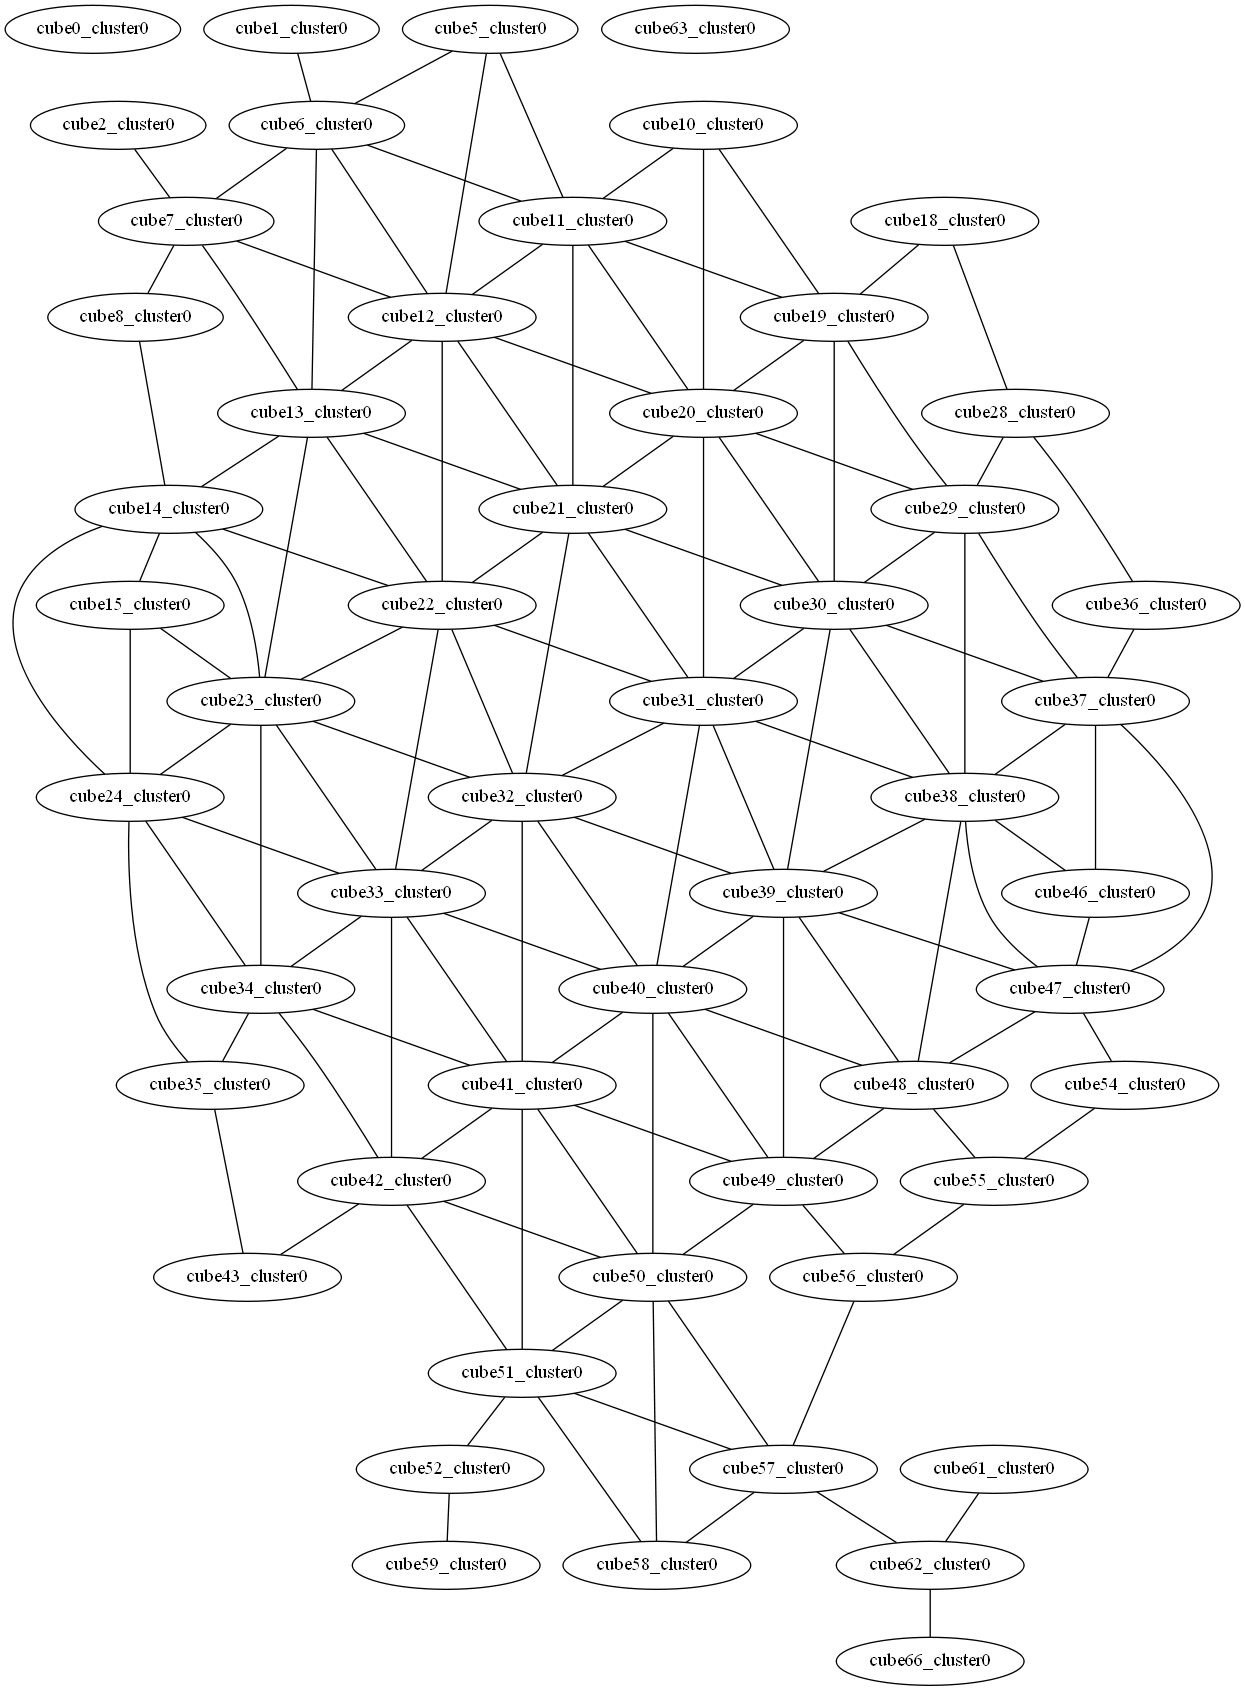

In [13]:
nx_graph = km.to_networkx(G)
print(type(nx_graph))
pd_graph = nx.drawing.nx_pydot.to_pydot(nx_graph)
ipd.display(ipd.Image(pd_graph.create_png()))

In [14]:
def make_node_names(graph):
    rename = {}
    for (nname, ntracks) in graph['nodes'].items():
        genre_dict = {}
        for track_id in ntracks:
            gt = y.iat[track_id]
            genre_dict[gt] = genre_dict.get(gt, 0) + 1

        sorted_genres = sorted(genre_dict, key=genre_dict.get, reverse=True)
        t = len(ntracks)
        g0 = sorted_genres[0]
        c = genre_dict[g0]
        if (c / t) < .5 :
            g1 = sorted_genres[1]
            c += genre_dict[g1]
            name = f'{g0}-{g1} {c}/{t}'
        else:
            name = f'{g0} {c}/{t}'
        rename[nname] = name
    return rename



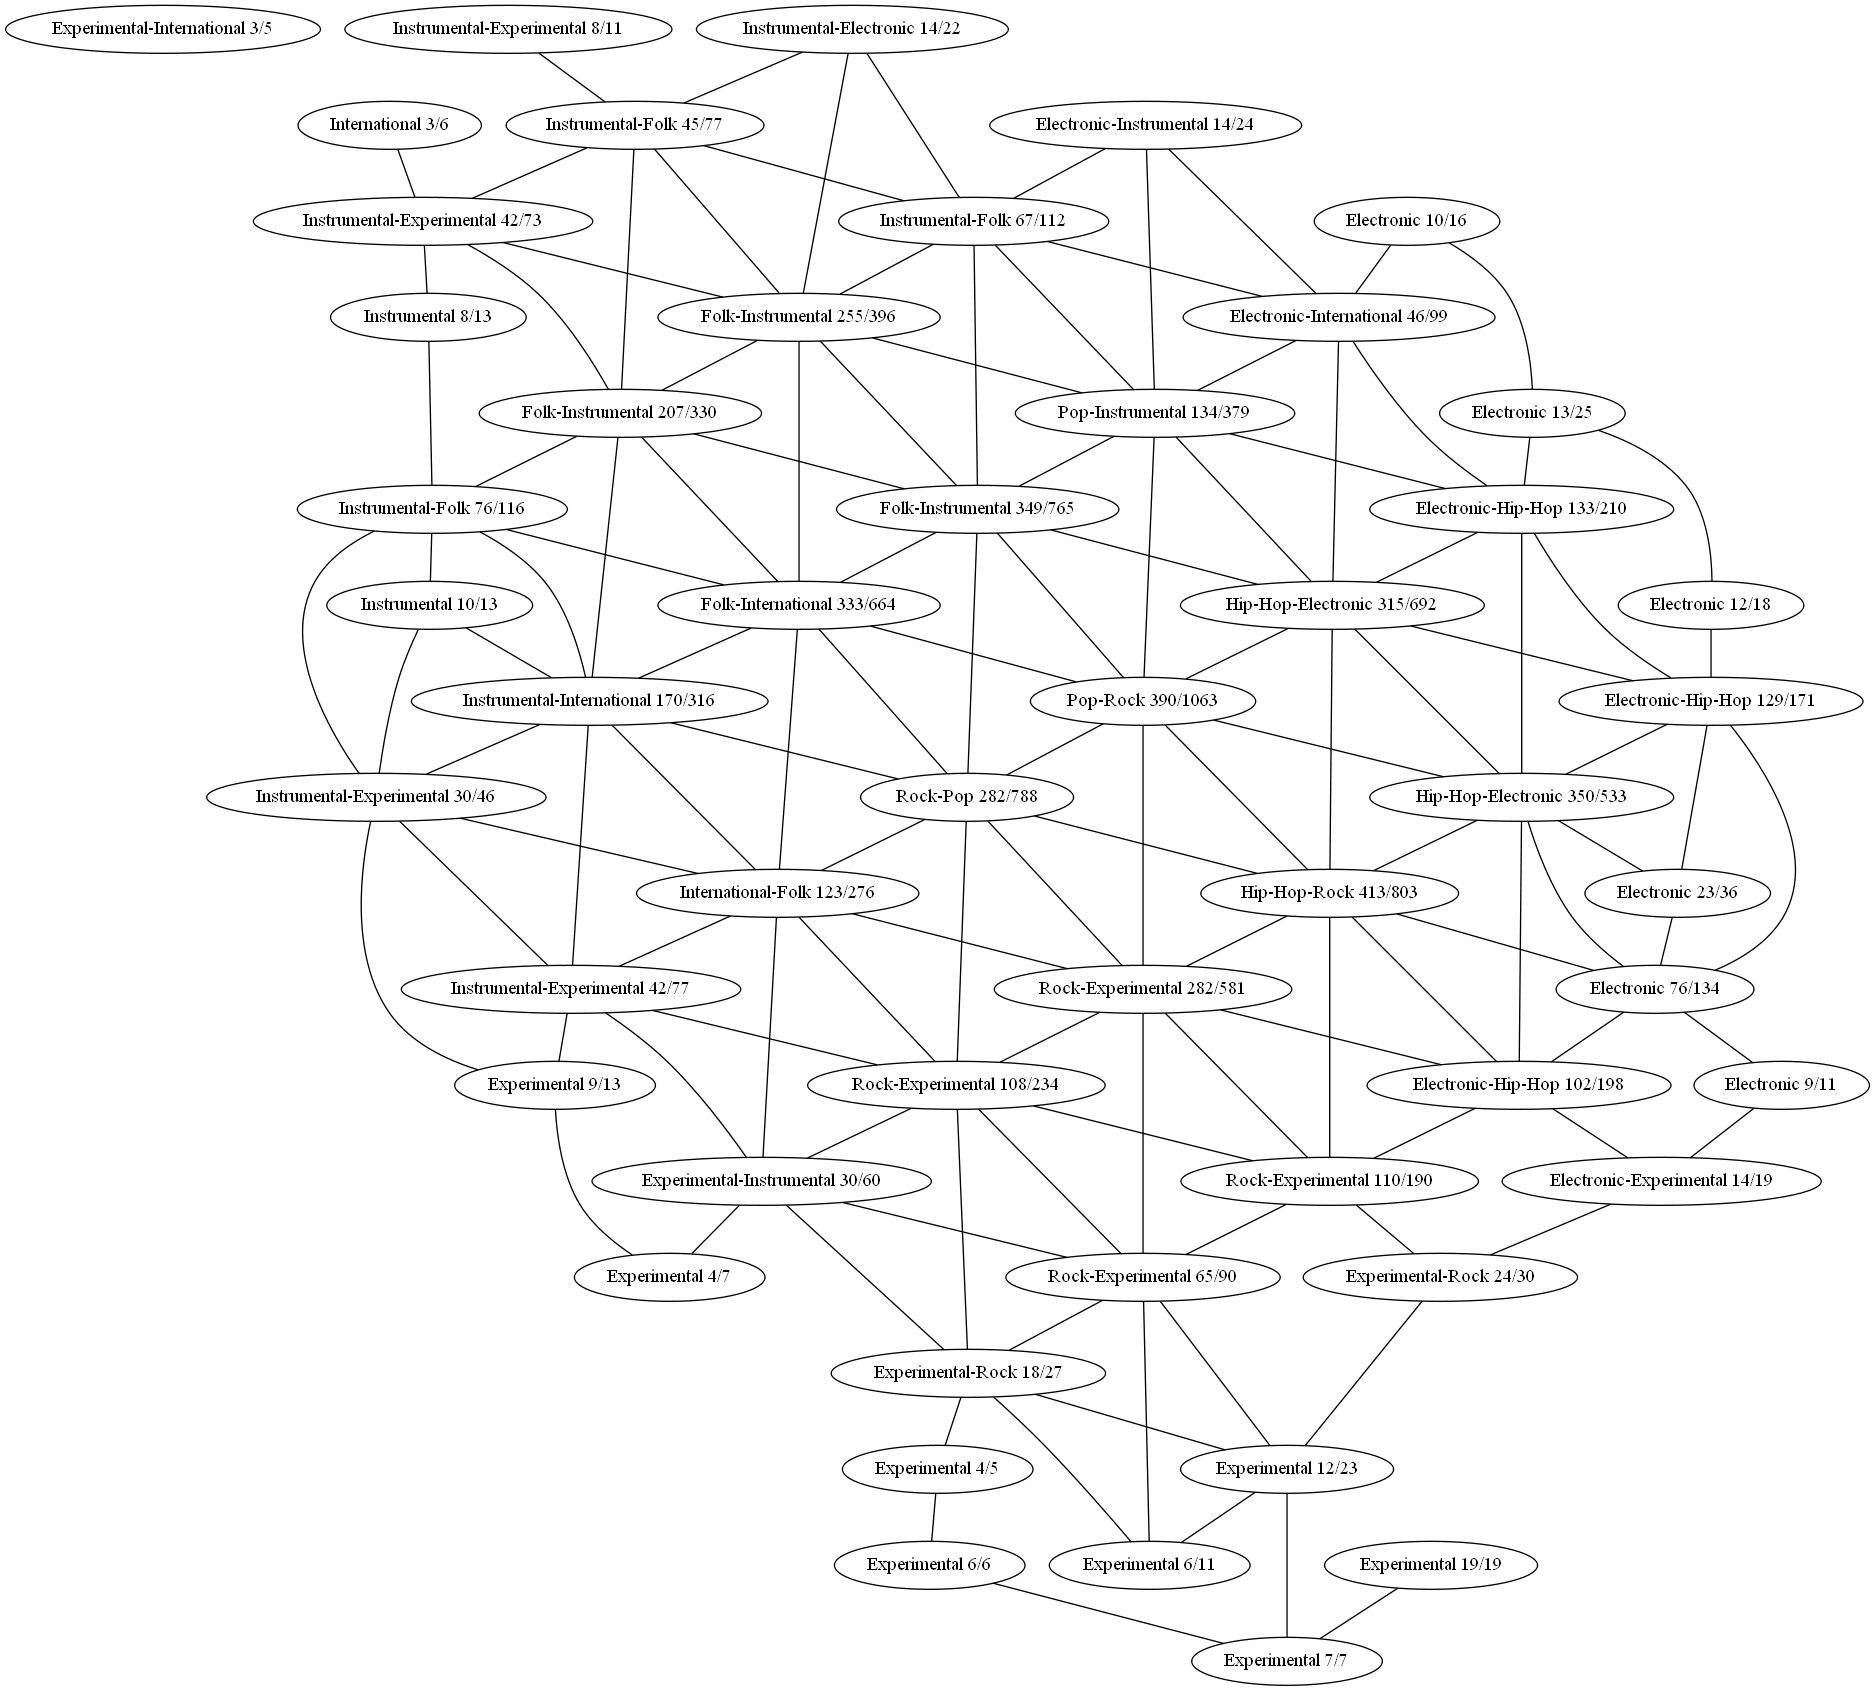

In [15]:
relabel = make_node_names(G)

nx_graph = nx.relabel.relabel_nodes(nx_graph, relabel)
pd_graph = nx.drawing.nx_pydot.to_pydot(nx_graph)
ipd.display(ipd.Image(pd_graph.create_png()))


In [36]:
G = fit_kepler_mapper(X, eps=2.0, cover=km.Cover(20,0.1))

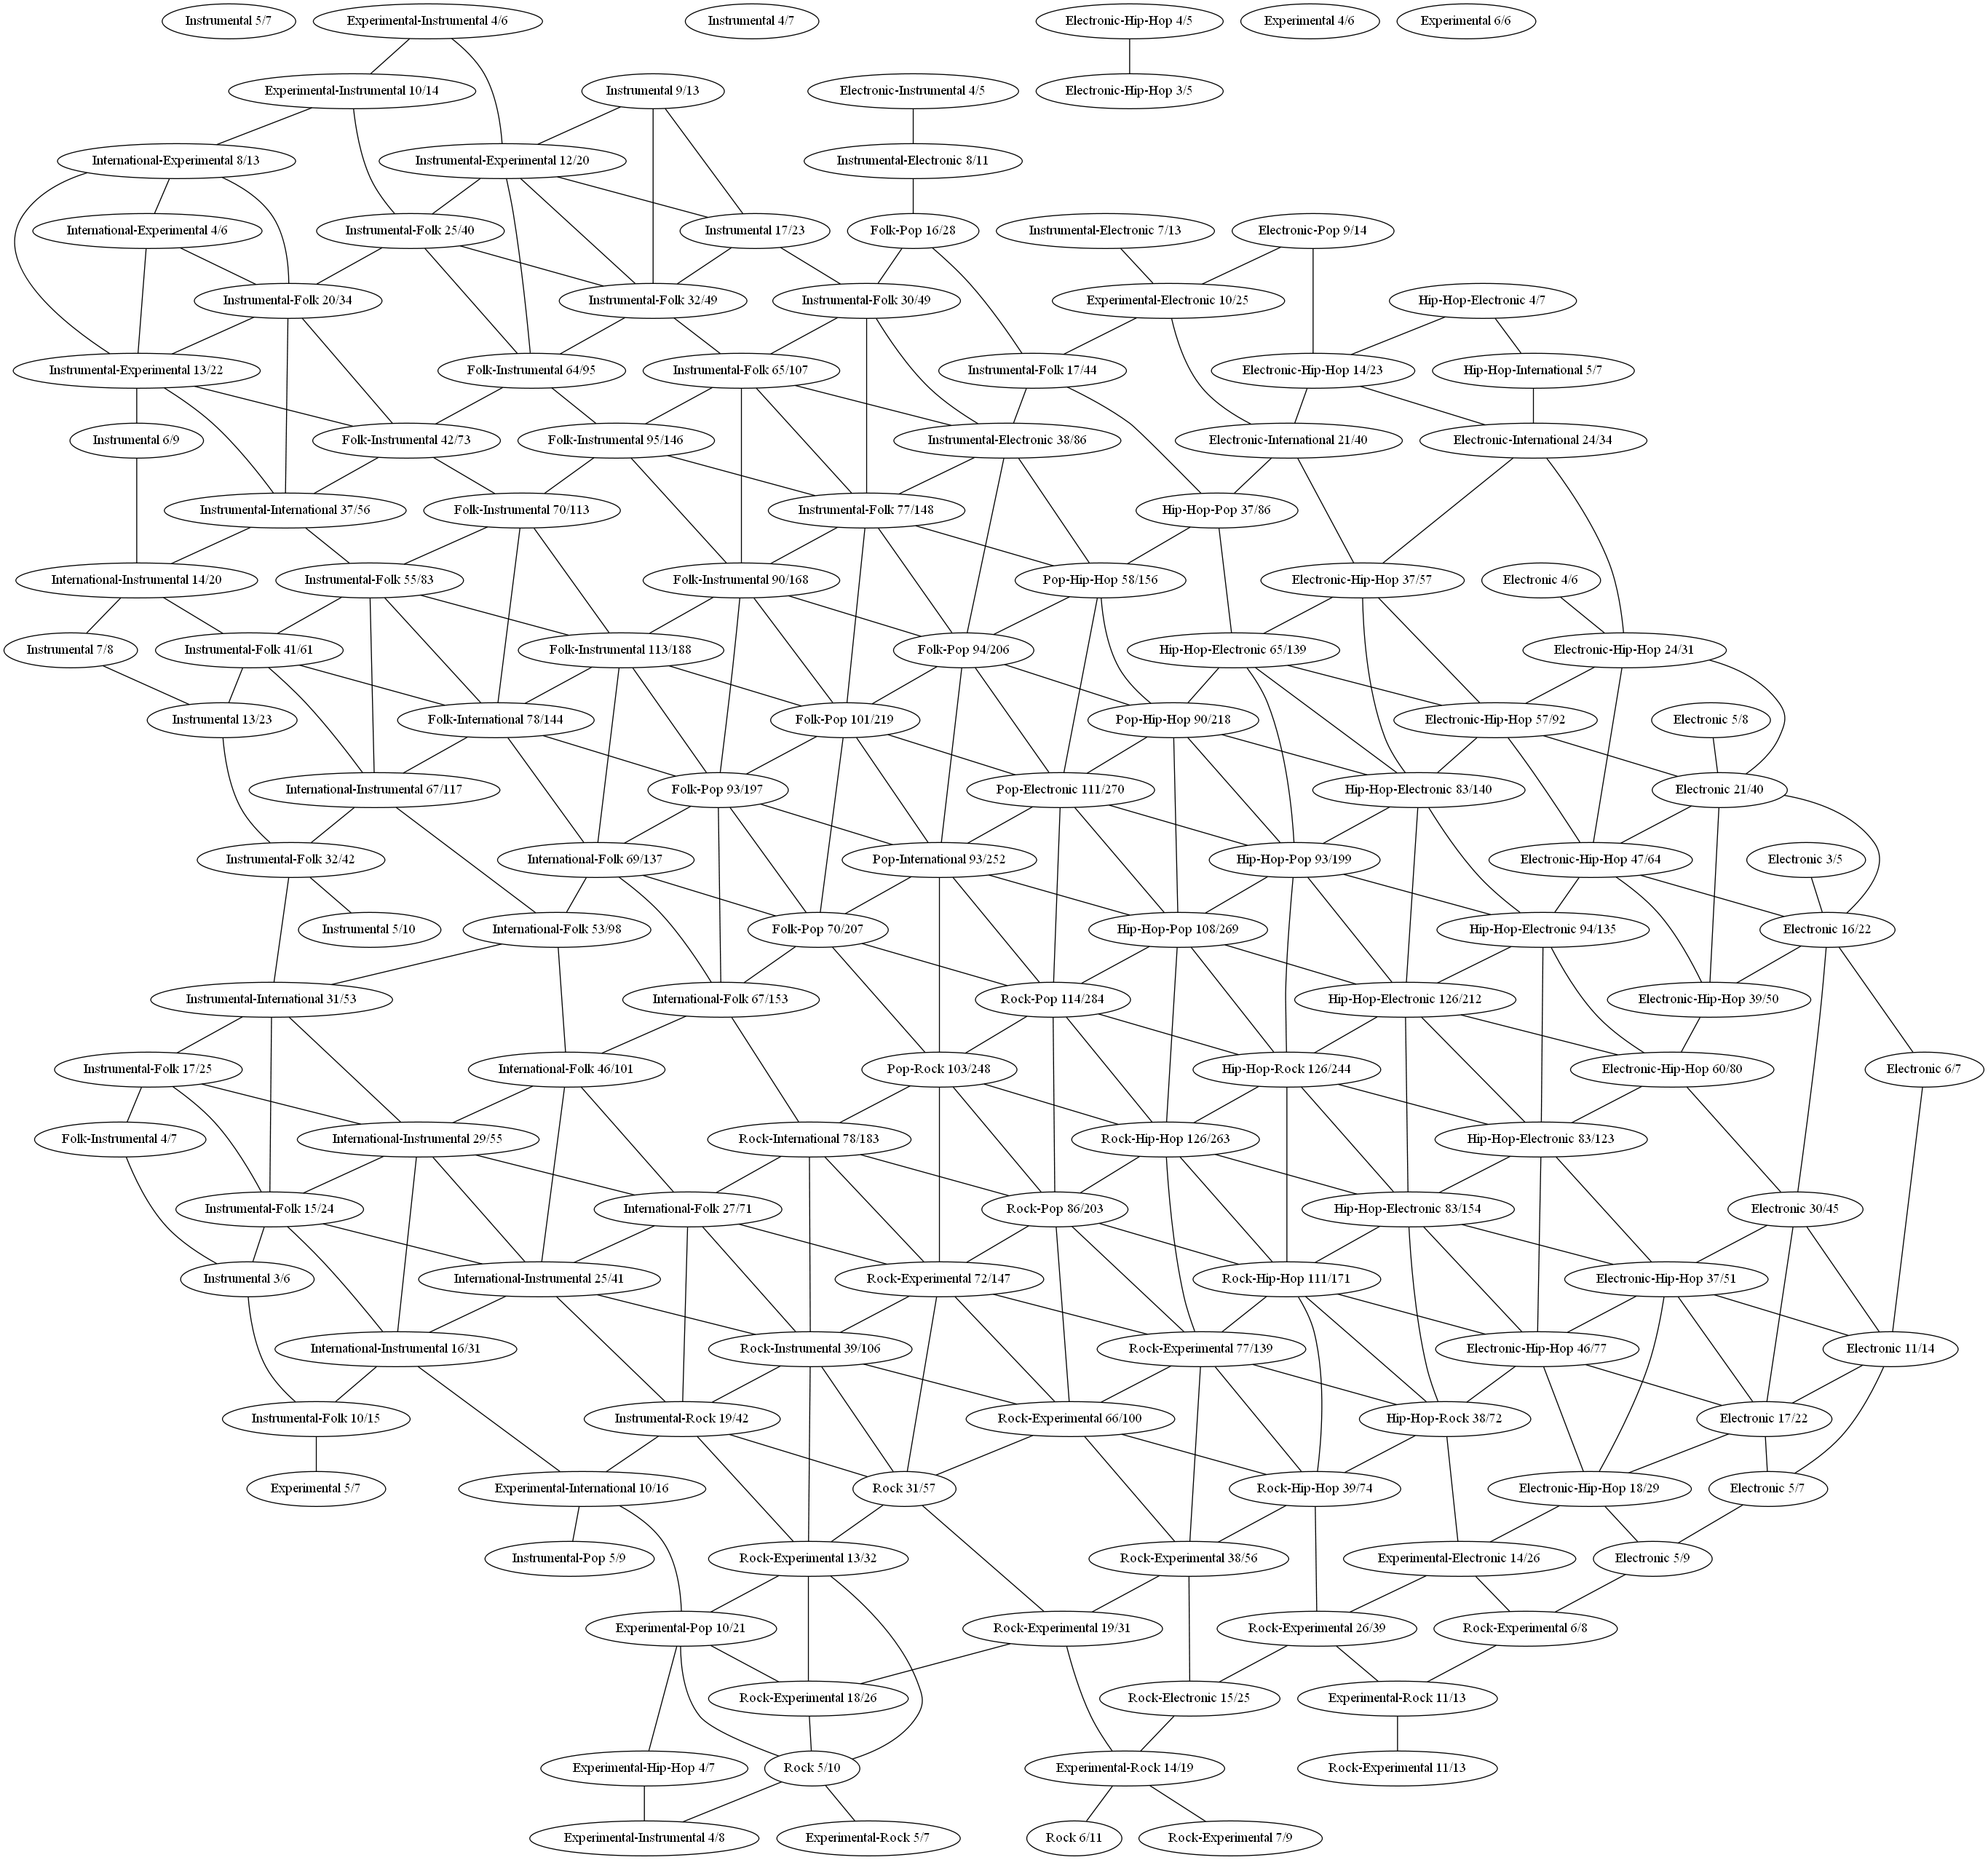

In [37]:
nx_graph = km.to_networkx(G)
relabel = make_node_names(G)
nx_graph = nx.relabel.relabel_nodes(nx_graph, relabel)
pd_graph = nx.drawing.nx_pydot.to_pydot(nx_graph)
ipd.display(ipd.Image(pd_graph.create_png()))